In [1]:
# Nadhifa Sofia, created on Apr 6th 2020
"""
A wood craftsman wants to make a tube-shaped decoration without a lid. 
The tube is expected to hold a liquid of not less than 200. 
Help the craftsman to design the tube with minimal materials using genetic algorithms.
"""


'\nA wood craftsman wants to make a tube-shaped decoration without a lid. \nThe tube is expected to hold a liquid of not less than 200. \nHelp the craftsman to design the tube with minimal materials using genetic algorithms.\n'

In [2]:
# Importing standard libraries for the porject
import math
import random
import operator
import matplotlib.pyplot as plt

In [6]:
# 3. Fitness Function
class Chromosome:
  def __init__(self,r,t):
    self.r = r
    self.t =t
    self.surfaceArea = 2*math.pi*r*t + math.pi*r*r
    self.volume = math.pi*r*r*t
    if self.volume < 200:
      self.fitnessValue = 10**(-8)*self.volume
    else :
      self.fitnessValue = 1 / self.surfaceArea
  def print(self):
    print("-radius : ",self.r)
    print("-height : ",self.t)
    print("-surface area : ",self.surfaceArea)
    print("-volume : ",self.volume)
    print("-fitness : ",self.fitnessValue)

#example of chromosome
cr1 = Chromosome(20,20)
cr1.print()

-radius :  20
-height :  20
-surface area :  3769.9111843077517
-volume :  25132.741228718347
-fitness :  0.00026525823848649226


In [4]:
# 4. Generate Population 
def generateRandom(populationSize=6, rUpper=15, tUpper=15):
  population = []
  for i in range(populationSize):
    r = random.uniform(0.1, rUpper)
    t = random.uniform(0.1, tUpper)
    population += [Chromosome(r,t)]
  
  return population

# If population size = 6
population = generateRandom(6,15,20)
for i in range(len(population)):
  print("Chromosome",i,":")
  population[i].print()

Chromosome 0 :
-radius :  9.20423251938926
-height :  8.32753234254347
-surface area :  747.7461259891968
-volume :  2216.365409340458
-fitness :  0.0013373522981173528
Chromosome 1 :
-radius :  9.653101188131737
-height :  9.48345030463475
-surface area :  867.9333735657469
-volume :  2776.1949686511493
-fitness :  0.0011521621710335681
Chromosome 2 :
-radius :  10.145530389022685
-height :  1.9103470270497018
-surface area :  445.1471998133061
-volume :  617.7484318889058
-fitness :  0.0022464479174965
Chromosome 3 :
-radius :  8.48134257586777
-height :  13.320122890537473
-surface area :  935.8120359851042
-volume :  3010.1442998142606
-fitness :  0.001068590658750533
Chromosome 4 :
-radius :  8.964934291140148
-height :  7.012185704955071
-surface area :  647.4747532341789
-volume :  1770.5064091659813
-fitness :  0.001544461764732809
Chromosome 5 :
-radius :  11.038187989156427
-height :  8.42403135658231
-surface area :  967.0251881125517
-volume :  3224.5225600897356
-fitness :

In [7]:
# 5 and 6. Selection using Baker's SUS with mpool = 10
def bakerSus(population, parentSize=10):
  parents = []
  individuProbabilities = []
  fitnessSum = 0.
  for idv in population:
    fitnessSum += idv.fitnessValue
  
  for idv in population:
    individuProbabilities += [ idv.fitnessValue/fitnessSum ]

  randomValueUpperLimit = 1./parentSize
  randomValue = random.uniform(0., randomValueUpperLimit)

  #selecting parents
  for i in range(parentSize):
    for idvIndex in range(len(population)):
      idvProb = individuProbabilities[idvIndex]
      idv = population[idvIndex]
      if idvProb <= randomValue:
        parents += [idv]
        break
    
    randomValue += randomValueUpperLimit
  
  return parents

# Example of Baker's SUS
parents = bakerSus(population, 10)
for i in range(len(parents)):
  print("Selected Parent",i,":")
  parents[i].print()

Selected Parent 0 :
-radius :  9.653101188131737
-height :  9.48345030463475
-surface area :  867.9333735657469
-volume :  2776.1949686511493
-fitness :  0.0011521621710335681
Selected Parent 1 :
-radius :  9.20423251938926
-height :  8.32753234254347
-surface area :  747.7461259891968
-volume :  2216.365409340458
-fitness :  0.0013373522981173528
Selected Parent 2 :
-radius :  9.20423251938926
-height :  8.32753234254347
-surface area :  747.7461259891968
-volume :  2216.365409340458
-fitness :  0.0013373522981173528
Selected Parent 3 :
-radius :  9.20423251938926
-height :  8.32753234254347
-surface area :  747.7461259891968
-volume :  2216.365409340458
-fitness :  0.0013373522981173528
Selected Parent 4 :
-radius :  9.20423251938926
-height :  8.32753234254347
-surface area :  747.7461259891968
-volume :  2216.365409340458
-fitness :  0.0013373522981173528
Selected Parent 5 :
-radius :  9.20423251938926
-height :  8.32753234254347
-surface area :  747.7461259891968
-volume :  2216.3

In [9]:
# 7. Parent Selection based on Crossover
def selectParents(parents, PC=0.8):
  selectedParents = []
  for pr in parents:
    randomValue = random.uniform(0., 1.)
    if randomValue <= PC:
      selectedParents += [pr]
  
  return selectedParents

# Do the Crossover 
def waCrossover(parentA, parentB, alpha=0.5):
  # first randomize 0 <= alpha <= 1
  r1 = alpha*parentA.r + (1-alpha)*parentB.r
  t1 = alpha*parentA.t + (1-alpha)*parentB.t
  offspring1 = Chromosome(r1,t1)

  r2 = alpha*parentB.r + (1-alpha)*parentA.r
  t2 = alpha*parentB.t + (1-alpha)*parentA.t
  offspring2 = Chromosome(r2,t2)

  return offspring1, offspring2

# Selected Parent from Crossover
selectedParents = selectParents(parents, 0.8)
for i in range(len(selectedParents)):
  print("Selected Parent from Crossover",i,":")
  selectedParents[i].print()

Selected Parent from Crossover 0 :
-radius :  9.653101188131737
-height :  9.48345030463475
-surface area :  867.9333735657469
-volume :  2776.1949686511493
-fitness :  0.0011521621710335681
Selected Parent from Crossover 1 :
-radius :  9.20423251938926
-height :  8.32753234254347
-surface area :  747.7461259891968
-volume :  2216.365409340458
-fitness :  0.0013373522981173528
Selected Parent from Crossover 2 :
-radius :  9.20423251938926
-height :  8.32753234254347
-surface area :  747.7461259891968
-volume :  2216.365409340458
-fitness :  0.0013373522981173528
Selected Parent from Crossover 3 :
-radius :  9.20423251938926
-height :  8.32753234254347
-surface area :  747.7461259891968
-volume :  2216.365409340458
-fitness :  0.0013373522981173528
Selected Parent from Crossover 4 :
-radius :  9.20423251938926
-height :  8.32753234254347
-surface area :  747.7461259891968
-volume :  2216.365409340458
-fitness :  0.0013373522981173528
Selected Parent from Crossover 5 :
-radius :  9.20423

In [10]:
# The offspring after crossover
# Offspring size = selected parent size * (selected parent size - 1)
offsprings = []
for i in range(len(selectedParents)):
  for j in range(i+1,len(selectedParents)):
    off1, off2 = waCrossover(selectedParents[i], selectedParents[j])
    offsprings += [off1]
    offsprings += [off2]

for i in range(len(offsprings)):
  print("Offspring from Crossover",i,":")
  offsprings[i].print()

Offspring from Crossover 0 :
-radius :  9.428666853760499
-height :  8.90549132358911
-surface area :  806.8664892464574
-volume :  2487.1864293069957
-fitness :  0.0012393624141385676
Offspring from Crossover 1 :
-radius :  9.428666853760499
-height :  8.90549132358911
-surface area :  806.8664892464574
-volume :  2487.1864293069957
-fitness :  0.0012393624141385676
Offspring from Crossover 2 :
-radius :  9.428666853760499
-height :  8.90549132358911
-surface area :  806.8664892464574
-volume :  2487.1864293069957
-fitness :  0.0012393624141385676
Offspring from Crossover 3 :
-radius :  9.428666853760499
-height :  8.90549132358911
-surface area :  806.8664892464574
-volume :  2487.1864293069957
-fitness :  0.0012393624141385676
Offspring from Crossover 4 :
-radius :  9.428666853760499
-height :  8.90549132358911
-surface area :  806.8664892464574
-volume :  2487.1864293069957
-fitness :  0.0012393624141385676
Offspring from Crossover 5 :
-radius :  9.428666853760499
-height :  8.9054

In [12]:
# 8. Mutation
def uniformMutation(chromosome, upperLimit=15):
  r = chromosome.r
  t = chromosome.t

  randomValue = random.uniform(0., 1.)
  if randomValue < 0.5:
    r = random.uniform(0.1, upperLimit)
  else :
    t = random.uniform(0.1, upperLimit)
  
  return Chromosome(r,t)

# Example Mutation
PM = 0.1
for i in range(len(offsprings)):
  randomValue = random.uniform(0., 1.)
  if randomValue <= PM:
    print("--Offspring",i,"is mutated")
    print("Before mutation r=",offsprings[i].r, ", t = ", offsprings[i].t)
    offsprings[i] = uniformMutation(offsprings[i])
    print("After mutation r=",offsprings[i].r, ", t = ", offsprings[i].t)

--Offspring 16 is mutated
Before mutation r= 9.20423251938926 , t =  8.32753234254347
After mutation r= 9.20423251938926 , t =  0.17976281726188842
--Offspring 19 is mutated
Before mutation r= 9.20423251938926 , t =  8.32753234254347
After mutation r= 5.135344339138556 , t =  8.32753234254347
--Offspring 21 is mutated
Before mutation r= 9.20423251938926 , t =  8.32753234254347
After mutation r= 2.9996286674094246 , t =  8.32753234254347
--Offspring 23 is mutated
Before mutation r= 9.20423251938926 , t =  8.32753234254347
After mutation r= 9.20423251938926 , t =  6.10236262853447
--Offspring 28 is mutated
Before mutation r= 9.20423251938926 , t =  8.32753234254347
After mutation r= 9.678993286066996 , t =  8.32753234254347
--Offspring 39 is mutated
Before mutation r= 9.20423251938926 , t =  8.32753234254347
After mutation r= 14.533018264833354 , t =  8.32753234254347


In [13]:
# 9. Update Generations
def updateGeneration(population, populationSize=6):
  #sort descending based on fitness value, then slice
  population.sort(key=operator.attrgetter('fitnessValue'), reverse=True)
  population = population[:populationSize]
  return population

# Example Update Generations
population = population + offsprings
population = updateGeneration(population, 6)
print("Next generation's chromosomes")
for i in range(len(population)):
  print("Chromosome",i)
  population[i].print()

Next generation's chromosomes
Chromosome 0
-radius :  9.20423251938926
-height :  0.17976281726188842
-surface area :  276.5451455598025
-volume :  47.843715722291655
-fitness :  0.4784371572229166
Chromosome 1
-radius :  2.9996286674094246
-height :  8.32753234254347
-surface area :  185.2181920458737
-volume :  235.39714529301855
-fitness :  0.005399037691461356
Chromosome 2
-radius :  5.135344339138556
-height :  8.32753234254347
-surface area :  351.5481563317164
-volume :  689.9304928921284
-fitness :  0.0028445605018517367
Chromosome 3
-radius :  10.145530389022685
-height :  1.9103470270497018
-surface area :  445.1471998133061
-volume :  617.7484318889058
-fitness :  0.0022464479174965
Chromosome 4
-radius :  9.20423251938926
-height :  6.10236262853447
-surface area :  619.0603368772863
-volume :  1624.138446876901
-fitness :  0.0016153514293037736
Chromosome 5
-radius :  8.964934291140148
-height :  7.012185704955071
-surface area :  647.4747532341789
-volume :  1770.50640916

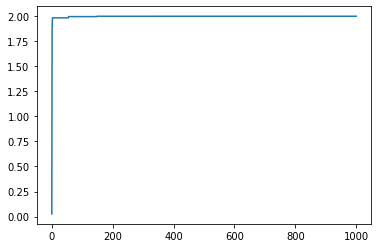

Chromosome with best fitness value after 1000 iterations:
-radius :  2.5449274178771297
-height :  9.825934157203386
-surface area :  177.4661626924485
-volume :  199.92841528313048
-fitness :  1.9992841528313048


In [14]:
# 10. For 1 Generation of GA case
populationSize = 6
parentSize = 10
PC = 0.8
PM = 0.1
MaxIter = 1000
alpha = 0.7


population = generateRandom(populationSize)
bestFitness = population[0].fitnessValue
bestFitnessHistory = [bestFitness]
for iteration in range(MaxIter):
  parents = bakerSus(population, parentSize)
  parents = selectParents(parents, PC)
  offsprings = []

  for i in range(len(parents)):
    for j in range(i+1, len(parents)):
      off1, off2 = waCrossover(parents[i], parents[j], alpha)
      offsprings += [off1] + [off2]

  for i in range(len(offsprings)):
    randomValue = random.uniform(0., 1.)
    if randomValue < PM:
      offsprings[i] = uniformMutation(offsprings[i])

  population = population + offsprings
  population = updateGeneration(population, populationSize)

  bestFitness = max(bestFitness, population[0].fitnessValue)
  bestFitnessHistory += [bestFitness]

# Data vISUALIZATION
plt.plot(bestFitnessHistory)
plt.ylabel = 'Best Fitness Value Throughout Iteration'
plt.xlabel = 'Iteration'
plt.show()
print("Chromosome with best fitness value after", MaxIter,"iterations:")
population[0].print()